## Setting Up

In [444]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt #for qualitative and quantitative analysis
import seaborn as sns #for qualitative and quantitative analysis
import ipywidgets as widgets
from IPython import display
from datetime import datetime, timedelta
from itertools import count
from statistics import mean

In [445]:
#importing given data
data_cab = pd.read_csv("Cab_Data.csv")
data_city = pd.read_csv("City.csv")
data_customer = pd.read_csv("Customer_ID.csv")
data_transaction = pd.read_csv("Transaction_ID.csv")

In [446]:
#displays multiple lines of code
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 1. Variable Exploration and Identification

### Cab Data

In [447]:
#Exploring Cab Data Set
data_cab.head()
data_cab.shape
#data_cab.columns

data_cab.nunique(axis=0) 
data_cab.info() #checks for null values and tells us data types

#SEE unique values in the code to be able to determine if City Data has an extra value
for col in data_cab.columns:
    print('{} : {}'.format(col,data_cab[col].unique())) #checked for symbols and typos, all clear.

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


(359392, 7)

Transaction ID    359392
Date of Travel      1095
Company                2
City                  19
KM Travelled         874
Price Charged      99176
Cost of Trip       16291
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
Transaction ID : [10000011 10000012 10000013 ... 10440105 10440106 10440107]
Date of Travel : [42377 42375 42371 ... 43461 43464 43460]
Company : ['Pink Cab' 'Yellow Cab']
City : ['ATLANTA GA' 'AUSTIN TX' 'BOSTON MA' 'CHICAGO IL' 'DALLAS TX' 'DENVER CO'
 'LOS ANGELES CA' 'MIAMI FL' 'NASHVILLE TN' 'NEW YORK NY' 'ORANGE COUNTY'
 'PHOENIX AZ' 'PITTSBURGH PA' 'SACRAMENTO CA' 'SAN DIEGO CA' 'SEATTLE WA'
 'SILICON V

1. Notice how there are 19 unique cities in this transaction database but 20 in the city dataframe. Which one has no transactions in it?
2. Fix Date and Time.

### City Data

In [448]:
#Exploring City Data Set
data_city.head()
data_city.shape
#data_city.columns

data_city.nunique(axis=0)
data_city.info()

#Print unique values compared to Cab Data
for col in data_city.columns:
    print('{} : {}'.format(col,data_city[col].unique()))

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


(20, 3)

City          20
Population    20
Users         20
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
City : ['NEW YORK NY' 'CHICAGO IL' 'LOS ANGELES CA' 'MIAMI FL' 'SILICON VALLEY'
 'ORANGE COUNTY' 'SAN DIEGO CA' 'PHOENIX AZ' 'DALLAS TX' 'ATLANTA GA'
 'DENVER CO' 'AUSTIN TX' 'SEATTLE WA' 'TUCSON AZ' 'SAN FRANCISCO CA'
 'SACRAMENTO CA' 'PITTSBURGH PA' 'WASHINGTON DC' 'NASHVILLE TN'
 'BOSTON MA']
Population : [' 8,405,837 ' ' 1,955,130 ' ' 1,595,037 ' ' 1,339,155 ' ' 1,177,609 '
 ' 1,030,185 ' ' 959,307 ' ' 943,999 ' ' 942,908 ' ' 814,885 ' ' 754,233 '
 ' 698,371 ' ' 671,238 ' ' 631,442 ' ' 629,591 ' ' 545,776 ' ' 542,085 '
 ' 418,859 ' ' 327,225 ' ' 248,968 ']
Users : [' 302,149 ' ' 164,468 ' ' 144,132 ' ' 17,675 ' ' 27,247 ' ' 12,994 '
 ' 69,99

1. New York is aribitarily chosen from among those with the highest count, possibly based on it's poulation.
2. Population and Users can both actually be Int Values?

### Customer Data

In [449]:
#Exploring Cusomer Data Set
data_customer.head()
data_customer.shape
#data_customer.columns

data_customer.nunique(axis=0)
data_customer.info()

#for col in data_customer.columns:
#    print('{} : {}'.format(col,data_customer[col].unique()))

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


(49171, 4)

Customer ID           49171
Gender                    2
Age                      48
Income (USD/Month)    23341
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


### Transaction Data

In [450]:
#Exploring Transaction dataset
data_transaction.head()
data_transaction.shape
#data_transaction.columns

data_transaction.nunique(axis=0)
data_transaction.info()

#for col in data_transaction.columns:
#    print('{} : {}'.format(col,data_transaction[col].unique()))

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


(440098, 3)

Transaction ID    440098
Customer ID        49171
Payment_Mode           2
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


## 2. Data Preprocessing

### Cab Data

In [451]:
for col in data_cab.columns:
    if ' ' in col:
        data_cab = data_cab.rename(columns={col:col.replace(' ','_')})

In [452]:
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

data_cab['Date_of_Travel'] = data_cab['Date_of_Travel'].apply(lambda x:to_date_format(x))


In [453]:
data_cab = data_cab.replace('LOS ANGELES CA','LOSANGELES CA')
data_cab = data_cab.replace('NEW YORK NY','NEWYORK NY')
data_cab = data_cab.replace('ORANGE COUNTY', 'ORANGECOUNTY CA')
data_cab = data_cab.replace('SAN DIEGO CA', 'SANDIEGO CA')
data_cab = data_cab.replace('SILICON VALLEY', 'SILICONVALLEY CA')

data_cab[['City','State']] = data_cab.City.str.split(expand=True)

In [454]:
data_cab.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,State
0,10000011,2016-01-07,Pink Cab,ATLANTA,30.45,370.95,313.635,GA
1,10000012,2016-01-05,Pink Cab,ATLANTA,28.62,358.52,334.854,GA
2,10000013,2016-01-01,Pink Cab,ATLANTA,9.04,125.20,97.632,GA
3,10000014,2016-01-06,Pink Cab,ATLANTA,33.17,377.40,351.602,GA
4,10000015,2016-01-02,Pink Cab,ATLANTA,8.73,114.62,97.776,GA


In [455]:
pink_cab = data_cab[data_cab['Company'] == 'Pink Cab']
yellow_cab = data_cab[data_cab['Company'] == 'Yellow Cab']

### City Data

In [456]:
#Lets you see the number of times each city appears in the dataframe
#data_city.groupby(['City']).size()
#data_cab.groupby(['City']).size()

In [457]:
#Check for missing attribute in "City" collumn in City vs Cab Data
city_list_CityData = data_cab.City.unique()
not_found_CabData = data_city[~data_city['City'].isin(city_list_CityData)]
print(not_found_CabData)

                City   Population      Users
0        NEW YORK NY   8,405,837    302,149 
1         CHICAGO IL   1,955,130    164,468 
2     LOS ANGELES CA   1,595,037    144,132 
3           MIAMI FL   1,339,155     17,675 
4     SILICON VALLEY   1,177,609     27,247 
5      ORANGE COUNTY   1,030,185     12,994 
6       SAN DIEGO CA     959,307     69,995 
7         PHOENIX AZ     943,999      6,133 
8          DALLAS TX     942,908     22,157 
9         ATLANTA GA     814,885     24,701 
10         DENVER CO     754,233     12,421 
11         AUSTIN TX     698,371     14,978 
12        SEATTLE WA     671,238     25,063 
13         TUCSON AZ     631,442      5,712 
14  SAN FRANCISCO CA     629,591    213,609 
15     SACRAMENTO CA     545,776      7,044 
16     PITTSBURGH PA     542,085      3,643 
17     WASHINGTON DC     418,859    127,001 
18      NASHVILLE TN     327,225      9,270 
19         BOSTON MA     248,968     80,021 


In [458]:
data_city = data_city[data_city["City"].str.contains("SAN FRANCISCO CA") == False]
data_city = data_city.replace('LOS ANGELES CA','LOSANGELES CA')
data_city = data_city.replace('NEW YORK NY','NEWYORK NY')
data_city = data_city.replace('ORANGE COUNTY', 'ORANGECOUNTY CA')
data_city = data_city.replace('SAN DIEGO CA', 'SANDIEGO CA')
data_city = data_city.replace('SILICON VALLEY', 'SILICONVALLEY CA')

data_city[['City','State']] = data_city.City.str.split(expand=True)

In [459]:
#remove unnecessary junk text
data_city['Population'] = data_city['Population'].str.replace(',','')
data_city['Users'] = data_city['Users'].str.replace(',','')
data_city.head()

,City,Population,Users,State
0,NEWYORK,8405837,302149,NY
1,CHICAGO,1955130,164468,IL
2,LOSANGELES,1595037,144132,CA
3,MIAMI,1339155,17675,FL
4,SILICONVALLEY,1177609,27247,CA


In [460]:
#Convert City Data Objects to Strings to Integers

data_city['Population'] = pd.to_numeric(data_city['Population'])
data_city['Users'] = pd.to_numeric(data_city['Users'])
#data_city['Population'].astype(str).astype(int)
#d#ata_city['Users'].astype(str).astype(int)
data_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 19
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        19 non-null     object
 1   Population  19 non-null     int64 
 2   Users       19 non-null     int64 
 3   State       19 non-null     object
dtypes: int64(2), object(2)
memory usage: 760.0+ bytes


### Customer Data

In [461]:
#Change header names
for col in data_customer.columns:
    if ' ' in col:
        data_customer = data_customer.rename(columns={col:col.replace(' ','_')})

In [462]:
data_customer.head()

,Customer_ID,Gender,Age,Income_(USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


### Transaction Data

In [463]:
#Change header names
for col in data_transaction.columns:
    if ' ' in col:
        data_transaction = data_transaction.rename(columns={col:col.replace(' ','_')})

In [464]:
data_transaction.head()
data_transaction.groupby(['Customer_ID']).size()

,Transaction_ID,Customer_ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


Customer_ID
1        29
2        40
3        46
4        26
5        31
         ..
59996     4
59997    10
59998     9
59999     8
60000    18
Length: 49171, dtype: int64

## 3. Univariate Analysis

In [465]:
#sns.pairplot(data_cab, hue='Company')

In [466]:
#of Continous Variables
pink_cab[['KM_Travelled', 'Price_Charged','Cost_of_Trip']].describe().applymap(lambda x: f"{x:0.1f}") #statistical analysis
yellow_cab[['KM_Travelled', 'Price_Charged', 'Cost_of_Trip']].describe().applymap(lambda x: f"{x:0.1f}") #statistical analysis

,KM_Travelled,Price_Charged,Cost_of_Trip
count,84711.0,84711.0,84711.0
mean,22.6,310.8,248.1
std,12.2,182.0,135.4
min,1.9,15.6,19.0
25%,12.0,160.0,131.9
50%,22.4,298.1,246.3
75%,33.0,441.5,360.2
max,48.0,1623.5,576.0


,KM_Travelled,Price_Charged,Cost_of_Trip
count,274681.0,274681.0,274681.0
mean,22.6,458.2,297.9
std,12.2,288.4,162.5
min,1.9,20.7,22.8
25%,12.0,226.7,158.4
50%,22.4,425.1,295.6
75%,33.0,633.9,432.4
max,48.0,2048.0,691.2


[Text(0.5, 1.0, 'Ride Costs per Company')]

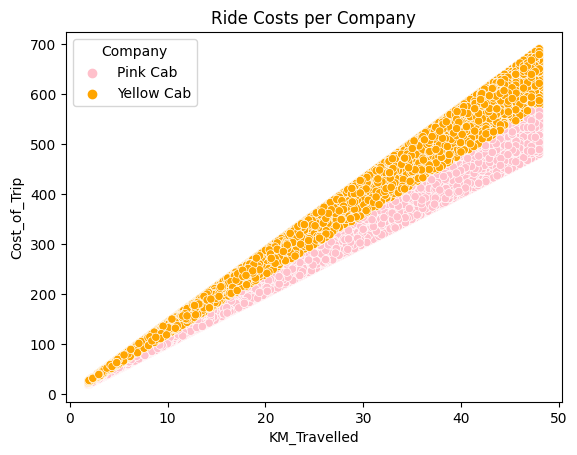

In [467]:
sns.scatterplot(data = data_cab, x = "KM_Travelled", y = "Cost_of_Trip", hue='Company', palette=['Pink', 'Orange'], legend='full').set(title='Ride Costs per Company')

Text(0.5, 0.98, 'Comparing Cab Ride Prices by Company')

[Text(0.5, 1.0, 'Pink Cab Prices')]

[Text(0.5, 1.0, 'Yellow Cab Prices')]

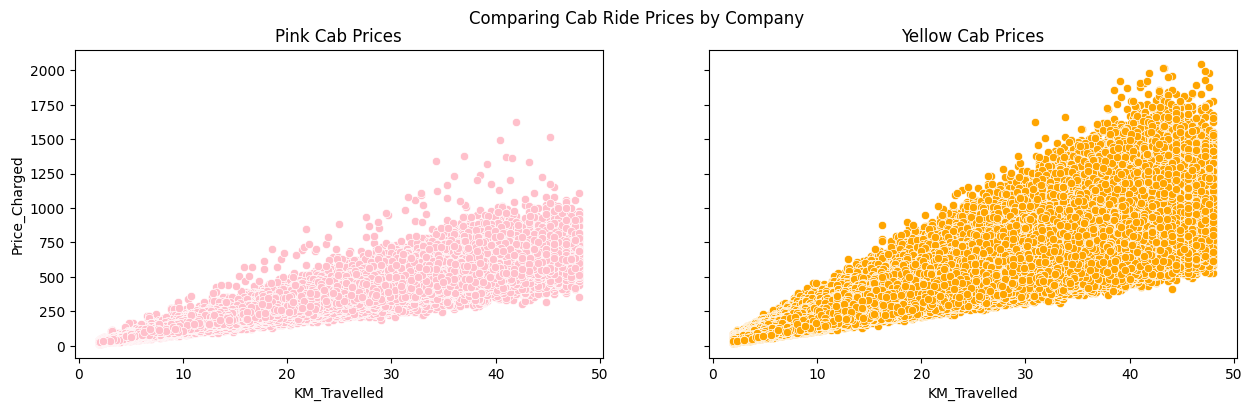

In [468]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4), sharey=True)
fig.suptitle('Comparing Cab Ride Prices by Company')

sns.scatterplot(ax=axes[0], data = pink_cab, x = "KM_Travelled", y = "Price_Charged", color=['pink'], legend='full').set(title='Pink Cab Prices')
sns.scatterplot(ax=axes[1], data = yellow_cab, x = "KM_Travelled", y = "Price_Charged", color=['orange'], legend='full').set(title='Yellow Cab Prices')

#### Findings
1. Yellow Cab company has higher costs
2. Yellow Cab Company also charges more for their customers and is costly

[Text(0.5, 1.0, 'Cab Company Popularity Per State')]

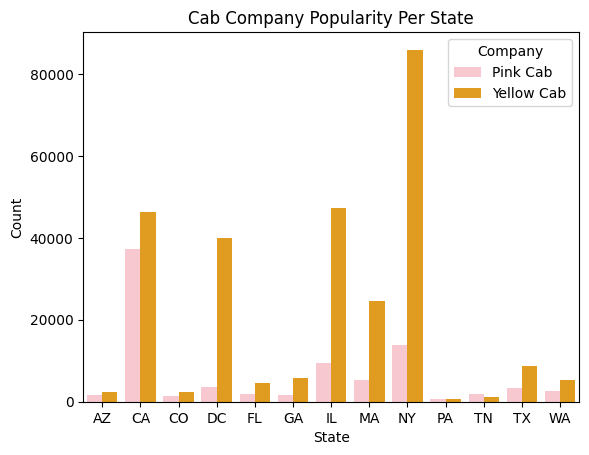

In [469]:
freq_state = data_cab.groupby(['State', 'Company']).agg(Count=("Transaction_ID", 'count'))
freq_state = freq_state.reset_index()
sns.barplot(data= freq_state, x="State",y="Count",hue="Company", palette=['Pink', 'Orange']).set(title='Cab Company Popularity Per State')

#### Findings
1. New York City has significantly higher cab usage than other cities, as per the database and recordings.
2. New York, California, Washington DC, Massachusets, Illinois and many other states significantly prefer the usage of Yellow Cab.

## 4. Bivariate Analysis

In [470]:
#Extract Month and Years in Cab Data

data_cab['Date_of_Travel'] = pd.to_datetime(data_cab['Date_of_Travel'])
data_cab['Date_of_Travel'].dt.to_period('M')
data_cab['Date_of_Travel'].dt.strftime('%m/%Y')
data_cab['Year'] = pd.to_datetime(data_cab['Date_of_Travel']).dt.year
data_cab['Month'] = pd.to_datetime(data_cab['Date_of_Travel']).dt.month
data_cab.head()


0         2016-01
1         2016-01
2         2016-01
3         2016-01
4         2016-01
           ...   
359387    2018-01
359388    2018-01
359389    2018-01
359390    2018-01
359391    2018-01
Name: Date_of_Travel, Length: 359392, dtype: period[M]

0         01/2016
1         01/2016
2         01/2016
3         01/2016
4         01/2016
           ...   
359387    01/2018
359388    01/2018
359389    01/2018
359390    01/2018
359391    01/2018
Name: Date_of_Travel, Length: 359392, dtype: object

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,State,Year,Month
0,10000011,2016-01-07,Pink Cab,ATLANTA,30.45,370.95,313.635,GA,2016,1
1,10000012,2016-01-05,Pink Cab,ATLANTA,28.62,358.52,334.854,GA,2016,1
2,10000013,2016-01-01,Pink Cab,ATLANTA,9.04,125.20,97.632,GA,2016,1
3,10000014,2016-01-06,Pink Cab,ATLANTA,33.17,377.40,351.602,GA,2016,1
4,10000015,2016-01-02,Pink Cab,ATLANTA,8.73,114.62,97.776,GA,2016,1


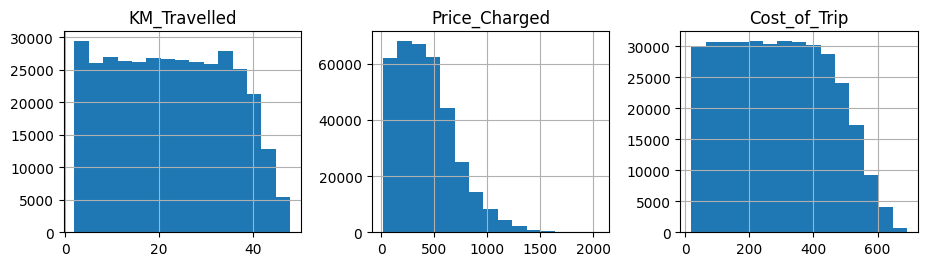

In [474]:
#Bivariate Analysis of Numerical Data
numerical = ['KM_Travelled', 'Price_Charged', 'Cost_of_Trip']
categorical = ['Company', 'City', 'State', 'Month', 'Year']
discrete = ['Transaction_ID', 'Date_of_Travel']
data_cab_groups = data_cab[numerical + categorical + discrete]
data_cab_groups[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));


<Figure size 800x500 with 0 Axes>

[Text(0.5, 1.0, 'Monthly Transactions by State')]

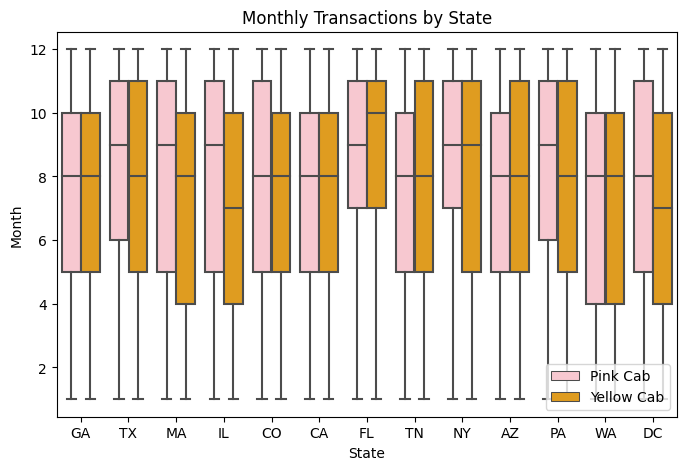

In [ ]:
#Bivariate Analysis of Categorical Data
plt.figure(figsize=(8,5))
sns.boxplot(x='State',y='Month',data=data_cab, hue='Company', palette=["Pink", "Orange"]).set(title="Monthly Transactions by State")
plt.legend(loc='lower right')

In [ ]:
#partially begin to create master data, only merging Transaction Data and Cab Data for now to save on runtime
data_cab_transaction = pd.merge(data_cab, data_transaction, on='Transaction_ID')
data_cab_transaction.head()


,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,State,Year,Month,Customer_ID,Payment_Mode
0,10000011,2016-01-07,Pink Cab,ATLANTA,30.45,370.95,313.635,GA,2016,1,29290,Card
1,10000012,2016-01-05,Pink Cab,ATLANTA,28.62,358.52,334.854,GA,2016,1,27703,Card
2,10000013,2016-01-01,Pink Cab,ATLANTA,9.04,125.20,97.632,GA,2016,1,28712,Cash
3,10000014,2016-01-06,Pink Cab,ATLANTA,33.17,377.40,351.602,GA,2016,1,28020,Cash
4,10000015,2016-01-02,Pink Cab,ATLANTA,8.73,114.62,97.776,GA,2016,1,27182,Card


,Payment_Mode,Company,Count
0,Card,Pink Cab,50719
1,Card,Yellow Cab,164785
2,Cash,Pink Cab,33992
3,Cash,Yellow Cab,109896


[Text(0.5, 1.0, 'Payment Mode Frequency by Company'),
 Text(0, 0.5, 'Number of Transactions')]

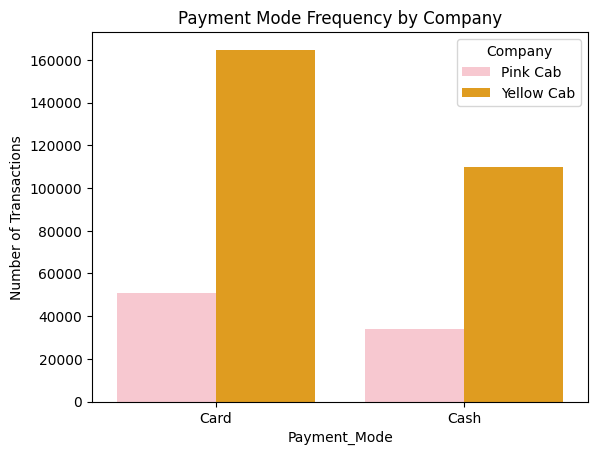

In [ ]:
freq_paymentmode_company = data_cab_transaction.groupby(['Payment_Mode', 'Company']).agg(Count=("Transaction_ID", 'count'))
freq_paymentmode_company = freq_paymentmode_company.reset_index()
freq_paymentmode_company.head()

sns.barplot(data= freq_paymentmode_company, x="Payment_Mode", y="Count", hue='Company', palette=["Pink", "Orange"]).set(title='Payment Mode Frequency by Company', ylabel=('Number of Transactions'))

## 5. Given Areas to Investigate

### A) Which company has maximum cab users at a particular time period?

Text(0.5, 0.98, 'Monthly Cab Usage per Company')

[Text(0.5, 1.0, 'Pink Cab'), Text(0, 0.5, 'Number of Transactions')]

[Text(0, 0.5, 'Count')]

[Text(0.5, 1.0, 'Yellow Cab'), Text(0, 0.5, 'Number of Transactions')]

[Text(0, 0.5, 'Count')]

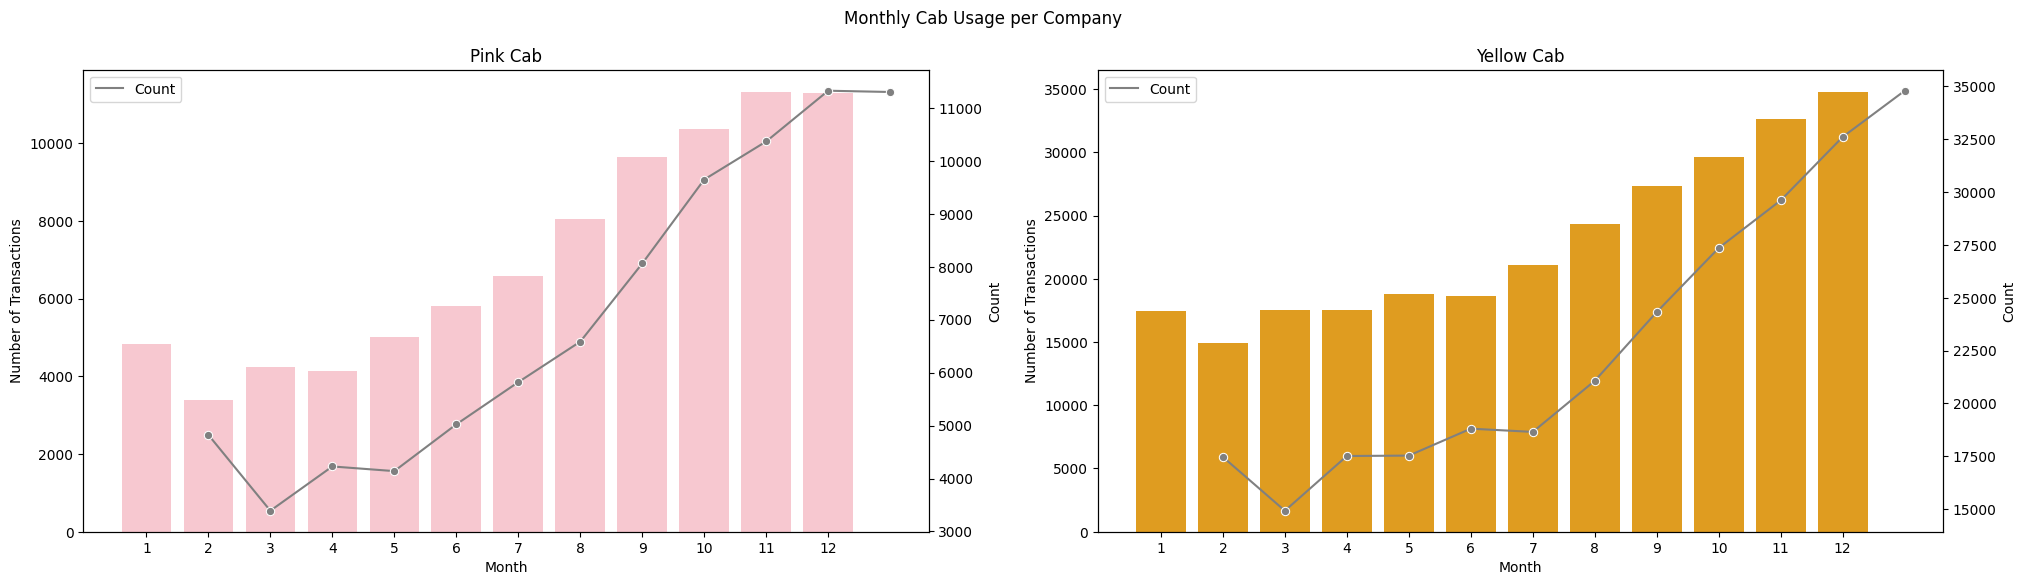

In [ ]:
freq_month_pink = data_cab[data_cab.Company=='Pink Cab'].groupby(['Month']).Transaction_ID.count()
freq_month_yellow = data_cab[data_cab.Company=='Yellow Cab'].groupby(['Month']).Transaction_ID.count()
avg_trans_pink = data_cab[data_cab.Company=='Pink Cab'].groupby(['Month']).agg(Count=("Transaction_ID", 'count'))
avg_trans_yellow = data_cab[data_cab.Company=='Yellow Cab'].groupby(['Month']).agg(Count=("Transaction_ID", 'count'))

fig, axes = plt.subplots(1, 2, figsize=(24, 6), sharey=False)
fig.suptitle('Monthly Cab Usage per Company')

sns.barplot(ax=axes[0], x=freq_month_pink.index,y=freq_month_pink.values, palette=['Pink']).set(title='Pink Cab', ylabel=('Number of Transactions'))
ax2 = axes[0].twinx()
sns.lineplot(data = avg_trans_pink, marker='o', sort = False, ax=ax2, palette=['grey']).set(ylabel=('Count'))

sns.barplot(ax=axes[1], x=freq_month_yellow.index,y=freq_month_yellow.values, palette=['Orange']).set(title='Yellow Cab', ylabel=('Number of Transactions'))
ax3 = axes[1].twinx()
sns.lineplot(data = avg_trans_yellow, marker='o', sort = False, ax=ax3, palette=['grey']).set(ylabel=('Count'))


#### Findings
1. Peak cab usage is during the holidays and toward the end of the year for both companies
2. However, yellow cab is consumed more by populations all across America


### B) Does margin proportionally increase with increase in number of customers?


In [ ]:
#partially begin to create master data, adding Customer data now for further analysis
data_cab_transaction_customer = pd.merge(data_cab_transaction, data_customer, on='Customer_ID')
data_cab_transaction_customer.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,State,Year,Month,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month)
0,10000011,2016-01-07,Pink Cab,ATLANTA,30.45,370.95,313.6350,GA,2016,1,29290,Card,Male,28,10813
1,10351127,2018-07-20,Yellow Cab,ATLANTA,26.19,598.70,317.4228,GA,2018,7,29290,Cash,Male,28,10813
2,10412921,2018-11-22,Yellow Cab,ATLANTA,42.55,792.05,597.4020,GA,2018,11,29290,Card,Male,28,10813
3,10000012,2016-01-05,Pink Cab,ATLANTA,28.62,358.52,334.8540,GA,2016,1,27703,Card,Male,27,9237
4,10320494,2018-04-20,Yellow Cab,ATLANTA,36.38,721.10,467.1192,GA,2018,4,27703,Card,Male,27,9237


Text(0.5, 0.98, 'Customers over the Years per Company')

[Text(0.5, 1.0, 'Pink Cab'),
 Text(0, 0.5, 'Number of Customers'),
 (2016.0, 2018.0),

[Text(0.5, 1.0, 'Yellow Cab'),
 Text(0, 0.5, 'Number of Customers'),
 (2016.0, 2018.0),

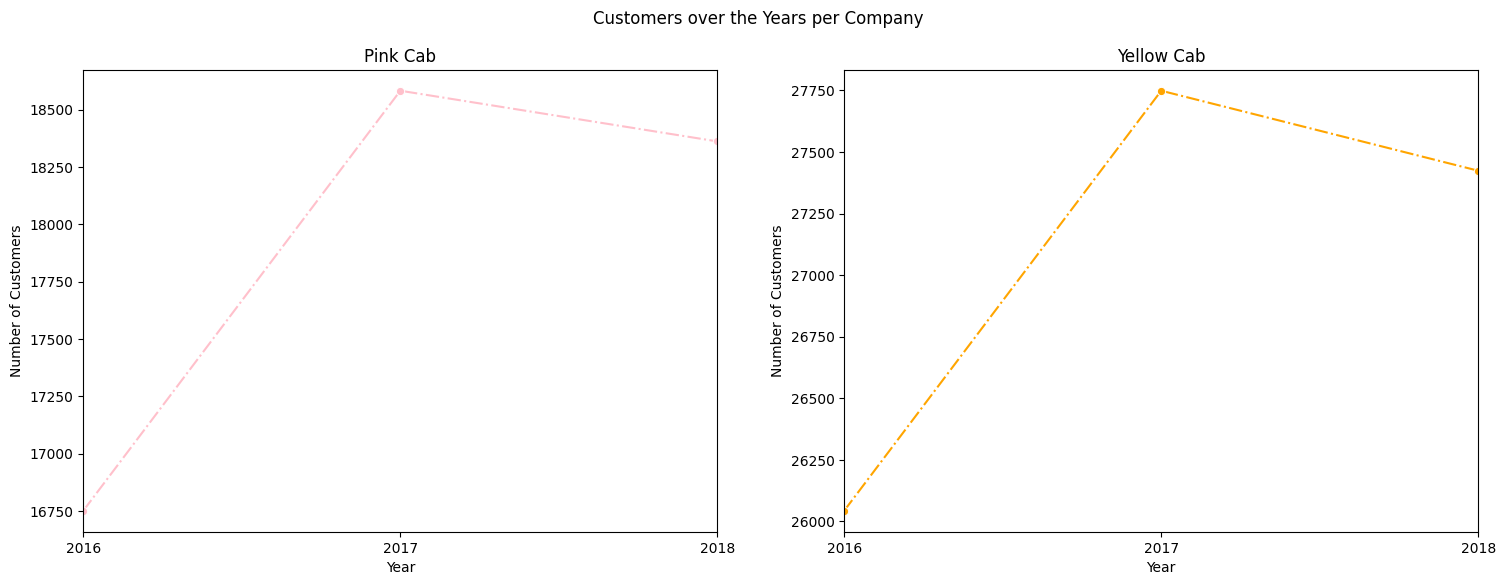

In [477]:
pink_customers_year = data_cab_transaction_customer[data_cab_transaction_customer.Company=='Pink Cab'].groupby(['Year']).Customer_ID.nunique()
yellow_customers_year = data_cab_transaction_customer[data_cab_transaction_customer.Company=='Yellow Cab'].groupby(['Year']).Customer_ID.nunique()

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)
fig.suptitle('Customers over the Years per Company')

sns.lineplot(ax=axes[0], x=pink_customers_year.index,y=pink_customers_year.values, color='pink', marker='o', linestyle='-.').set(title='Pink Cab', ylabel=('Number of Customers'), xlim=(2016,2018),xticks=(range(2016,2019)))
sns.lineplot(ax=axes[1], x=yellow_customers_year.index,y=yellow_customers_year.values, color='Orange', marker='o', linestyle='-.').set(title='Yellow Cab', ylabel=('Number of Customers'), xlim=(2016,2018),xticks=(range(2016,2019)))

<Figure size 700x500 with 0 Axes>

<BarContainer object of 3 artists>

<BarContainer object of 3 artists>

[Text(0, 0.5, 'Profit'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Pink Cab Profit Margin')]

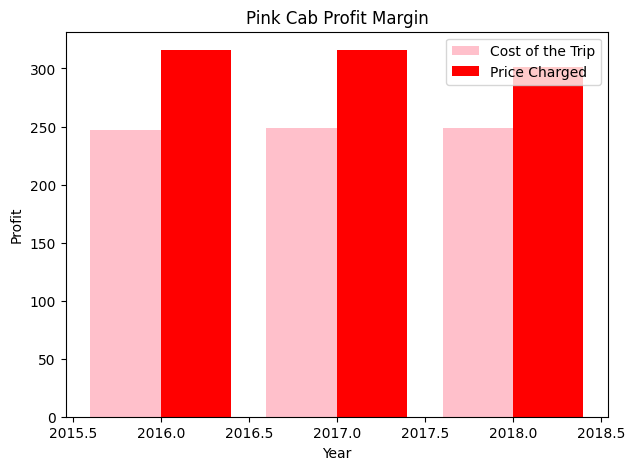

In [476]:
pink_yearly_transactions = data_cab_transaction_customer[data_cab_transaction_customer.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
pink_yearly_price = data_cab_transaction_customer[data_cab_transaction_customer.Company=='Pink Cab'].groupby('Year').Price_Charged.mean()
pink_yearly_cost = data_cab_transaction_customer[data_cab_transaction_customer.Company=='Pink Cab'].groupby('Year').Cost_of_Trip.mean()

plt.figure(figsize=(7,5))
ax = plt.subplot(111)

ax.bar(pink_yearly_transactions.index-0.2, pink_yearly_cost.values, width=0.4, color='pink', align='center',label='Cost of the Trip')
ax.bar(pink_yearly_transactions.index+0.2, pink_yearly_price.values, width=0.4, color='red', align='center',label='Price Charged')
ax.set(ylabel='Profit', xlabel='Year', title='Pink Cab Profit Margin')
plt.legend()


<Figure size 700x500 with 0 Axes>

<BarContainer object of 3 artists>

<BarContainer object of 3 artists>

[Text(0, 0.5, 'Profit'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Yellow Cab Profit Margin')]

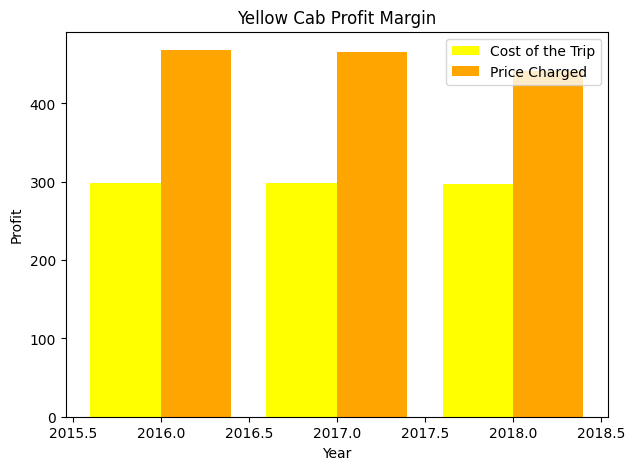

In [475]:
yellow_yearly_transactions = data_cab_transaction_customer[data_cab_transaction_customer.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
yellow_yearly_price = data_cab_transaction_customer[data_cab_transaction_customer.Company=='Yellow Cab'].groupby('Year').Price_Charged.mean()
yellow_yearly_cost = data_cab_transaction_customer[data_cab_transaction_customer.Company=='Yellow Cab'].groupby('Year').Cost_of_Trip.mean()

plt.figure(figsize=(7,5))
ax = plt.subplot(111)

ax.bar(yellow_yearly_transactions.index-0.2, yellow_yearly_cost.values, width=0.4, color='yellow', align='center',label='Cost of the Trip')
ax.bar(yellow_yearly_transactions.index+0.2, yellow_yearly_price.values, width=0.4, color='orange', align='center',label='Price Charged')
ax.set(ylabel='Profit', xlabel='Year', title='Yellow Cab Profit Margin')
plt.legend()


### C) What are the attributes of these cutsomer segments?

In [ ]:
#creating final master data
data_master = pd.merge(data_cab_transaction_customer, data_city, on=['City', 'State'])
data_master = data_master.rename(columns={'Income_(USD/Month)': 'Monthly_Income'})
data_master.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,State,Year,Month,Customer_ID,Payment_Mode,Gender,Age,Monthly_Income,Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA,30.45,370.95,313.6350,GA,2016,1,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-20,Yellow Cab,ATLANTA,26.19,598.70,317.4228,GA,2018,7,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-11-22,Yellow Cab,ATLANTA,42.55,792.05,597.4020,GA,2018,11,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-01-05,Pink Cab,ATLANTA,28.62,358.52,334.8540,GA,2016,1,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-04-20,Yellow Cab,ATLANTA,36.38,721.10,467.1192,GA,2018,4,27703,Card,Male,27,9237,814885,24701


([<matplotlib.patches.Wedge at 0x342698880>,
 [Text(-1.0820676307383874, 0.19781213943591264, 'Female'),
  Text(1.0820676122178736, -0.19781224074639553, 'Male')],
 [Text(-0.590218707675484, 0.10789753060140687, '44.2%'),
  Text(0.5902186975733855, -0.10789758586167028, '55.8%')])

Text(0.5, 1.0, 'Gender Frequency in Pink Cab Riders')

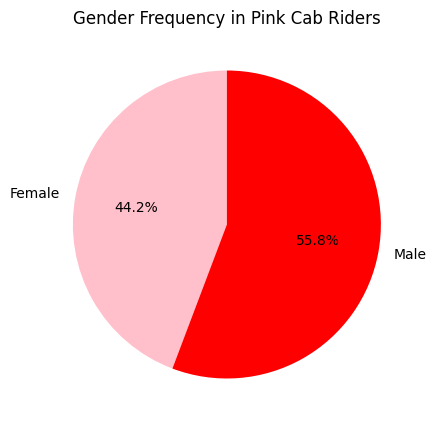

In [ ]:
pink_gender_transactions = data_master[data_master.Company=='Pink Cab'].groupby('Gender').Transaction_ID.count()
colours_p = ['pink', 'red']
figp, ax = plt.subplots(figsize=(10,5))
plt.pie(pink_gender_transactions.values , labels=pink_gender_transactions.index, autopct='%1.1f%%', startangle=90, colors=colours_p)
plt.title('Gender Frequency in Pink Cab Riders')

([<matplotlib.patches.Wedge at 0x342563220>,
 [Text(-1.0673970203210335, 0.26582626094834866, 'Female'),
  Text(1.067396995432578, -0.26582636088526956, 'Male')],
 [Text(-0.5822165565387455, 0.14499614233546287, '42.2%'),
  Text(0.5822165429632242, -0.14499619684651063, '57.8%')])

Text(0.5, 1.0, 'Gender Frequency in Yellow Cab Riders')

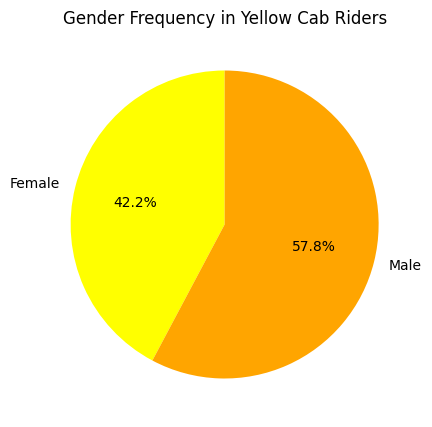

In [ ]:
yellow_gender_transactions = data_master[data_master.Company=='Yellow Cab'].groupby('Gender').Transaction_ID.count()
colours_y = ['yellow', 'orange']
figp, ax = plt.subplots(figsize=(10,5))
plt.pie(yellow_gender_transactions.values , labels=yellow_gender_transactions.index, autopct='%1.1f%%', startangle=90, colors=colours_y)
plt.title('Gender Frequency in Yellow Cab Riders')

,Payment_Mode,Monthly_Income,Count
0,Card,2000,1
1,Card,2001,1
2,Card,2003,1
3,Card,2004,2
4,Card,2007,5


<AxesSubplot: xlabel='Monthly_Income', ylabel='Count'>

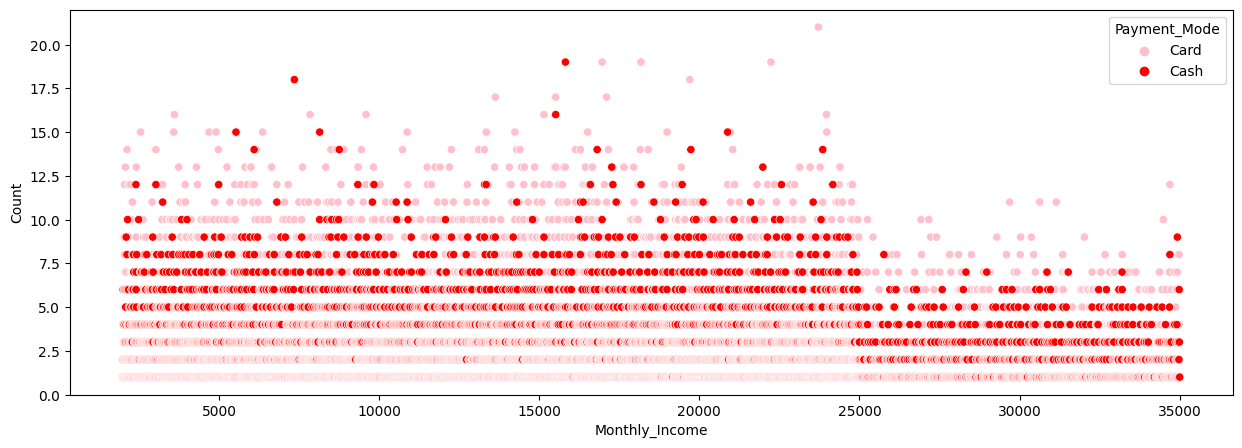

In [ ]:
pink_income = data_master[data_master.Company=='Pink Cab'].groupby(['Payment_Mode', 'Monthly_Income']).agg(Count=("Transaction_ID", 'count'))
pink_income = pink_income.reset_index()
pink_income.head()
figp, ax = plt.subplots(figsize=(15,5))
colours_p = ['pink', 'red']
sns.scatterplot(x="Monthly_Income", y="Count", hue="Payment_Mode", data=pink_income, palette=colours_p)


,Payment_Mode,Monthly_Income,Count
0,Card,2000,3
1,Card,2003,2
2,Card,2004,3
3,Card,2007,9
4,Card,2009,1


<AxesSubplot: xlabel='Monthly_Income', ylabel='Count'>

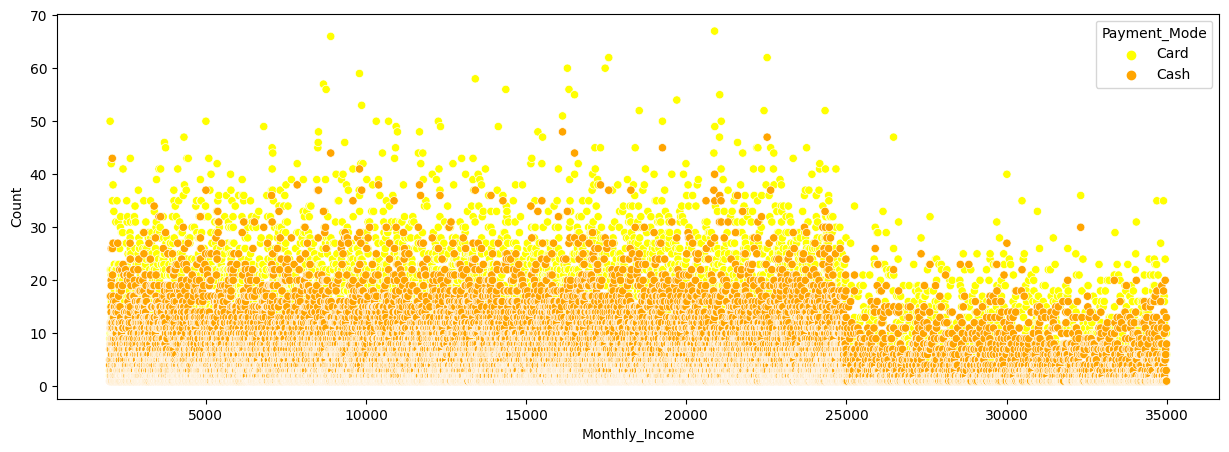

In [ ]:
yellow_income = data_master[data_master.Company=='Yellow Cab'].groupby(['Payment_Mode', 'Monthly_Income']).agg(Count=("Transaction_ID", 'count'))
yellow_income = yellow_income.reset_index()
yellow_income.head()
figp, ax = plt.subplots(figsize=(15,5))
colours_y = ['yellow', 'orange']
sns.scatterplot(x="Monthly_Income", y="Count", hue="Payment_Mode", data=yellow_income, palette=colours_y)

,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Age,Monthly_Income
KM_Travelled,1.000000,0.835753,0.981848,-0.001773,-0.001094,-0.000369,-0.000544
Price_Charged,0.835753,1.000000,0.859812,-0.059639,-0.036903,-0.003084,0.003228
Cost_of_Trip,0.981848,0.859812,1.000000,-0.008309,-0.001766,-0.000189,-0.000633
Month,-0.001773,-0.059639,-0.008309,1.000000,-0.033169,-0.002376,0.000585
Year,-0.001094,-0.036903,-0.001766,-0.033169,1.000000,-0.000497,-0.001679
Age,-0.000369,-0.003084,-0.000189,-0.002376,-0.000497,1.000000,0.003907
Monthly_Income,-0.000544,0.003228,-0.000633,0.000585,-0.001679,0.003907,1.000000


<Figure size 1000x500 with 0 Axes>

<AxesSubplot: >

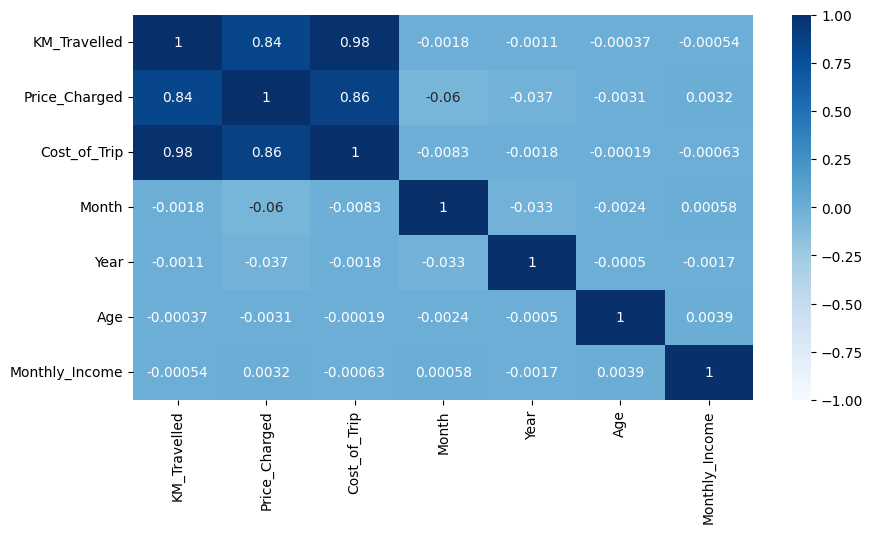

In [485]:
HP = data_master[['KM_Travelled','Price_Charged','Cost_of_Trip','Month','Year','Age','Monthly_Income']]
HP.corr()
plt.figure(figsize=(10,5))
sns.heatmap(HP.corr(),annot=True,vmin=-1,vmax=1,cmap='Blues')
plt.show()
